,date,sales,waste
0,2024-03-01,100,5
1,2024-03-02,120,8
2,2024-03-03,130,6
3,2024-03-04,90,4
4,2024-03-05,110,7


,Day,ARIMA Sales,Prophet Sales,LSTM Sales,Waste Prediction,Optimized Stock
0,1,369,367,362,24,345
1,2,368,359,364,18,350
2,3,375,376,383,25,350
3,4,401,396,398,22,379
4,5,416,417,419,27,389
5,6,418,411,403,29,389
6,7,422,434,424,29,393


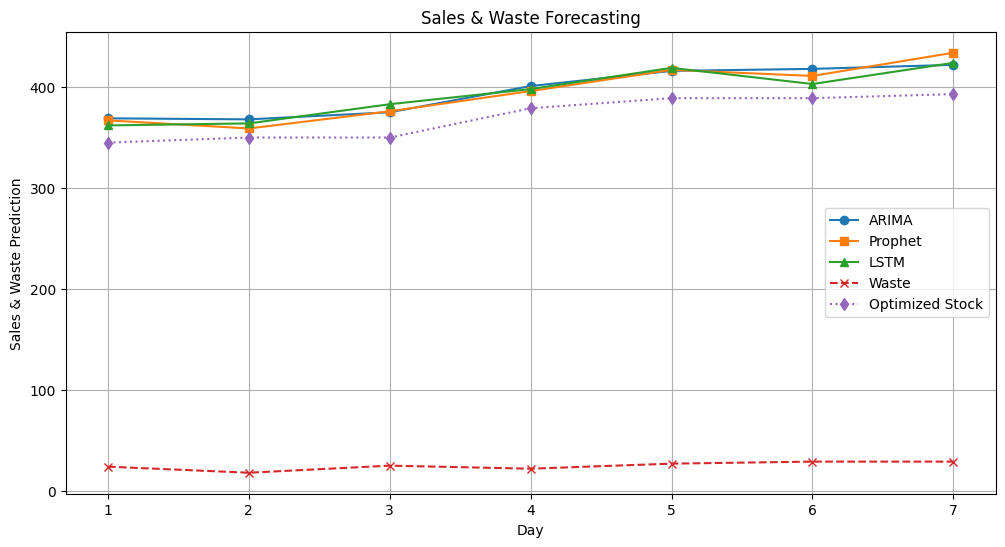

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Placeholder ML functions
def arima_forecast(sales):
    return [s + np.random.randint(-10, 10) for s in sales[-7:]]

def prophet_forecast(sales):
    return [s + np.random.randint(-5, 5) for s in sales[-7:]]

def lstm_forecast(sales):
    return [s + np.random.randint(-8, 8) for s in sales[-7:]]

def waste_forecast(waste):
    return [w + np.random.randint(-3, 3) for w in waste[-7:]]

def inventory_optimization(sales_pred, waste_pred):
    return [s - w for s, w in zip(sales_pred, waste_pred)]

# Load CSV file
csv_file = "hello1.csv"  # Change this to your actual CSV file
df = pd.read_csv(csv_file)

# Debug: Show first few rows
display(df.head())

# Check if required columns exist
if 'sales' not in df.columns or 'waste' not in df.columns:
    raise ValueError("CSV must contain 'sales' and 'waste' columns.")

sales = df['sales'].dropna().tolist()
waste = df['waste'].dropna().tolist()

# Ensure data is sufficient
if len(sales) < 7 or len(waste) < 7:
    raise ValueError("Insufficient data! At least 7 days of sales and waste data required.")

# Get predictions
arima_pred = arima_forecast(sales)
prophet_pred = prophet_forecast(sales)
lstm_pred = lstm_forecast(sales)
waste_pred = waste_forecast(waste)
optimized_stock = inventory_optimization(arima_pred, waste_pred)

# Display results in DataFrame
result_df = pd.DataFrame({
    'Day': range(1, 20),
    'ARIMA Sales': arima_pred,
    'Prophet Sales': prophet_pred,
    'LSTM Sales': lstm_pred,
    'Waste Prediction': waste_pred,
    'Optimized Stock': optimized_stock
})

display(result_df)

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(result_df['Day'], result_df['ARIMA Sales'], marker='o', label='ARIMA')
plt.plot(result_df['Day'], result_df['Prophet Sales'], marker='s', label='Prophet')
plt.plot(result_df['Day'], result_df['LSTM Sales'], marker='^', label='LSTM')
plt.plot(result_df['Day'], result_df['Waste Prediction'], marker='x', linestyle='dashed', label='Waste')
plt.plot(result_df['Day'], result_df['Optimized Stock'], marker='d', linestyle='dotted', label='Optimized Stock')

plt.xlabel("Day")
plt.ylabel("Sales & Waste Prediction")
plt.title("Sales & Waste Forecasting")
plt.legend()
plt.grid()
plt.show()
